In [1]:
import os
import sys
import glob
import numpy as np
import image_preprocessing
import cnn
import bayesian_network
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

%matplotlib inline  

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Credit: https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
    """
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
classes = {"Positive": 0, "Neutral": 1, "Negative": 2, "None": 3}
def classify_image(image_folder_path, image_name, real_label, cnn_model, bayesian_model, labels_list):
    with open('val_labels.json', mode='r', encoding='utf-8') as f:
        image_labels_dict = json.load(f)
    labels = image_labels_dict[image_name]

    print("RadhaKrishna")
#     print(labels)

    # preprocess the image
    image_preprocessing.preprocess(image_folder_path, image_name)

    # get mean cnn predictions for the faces from the image
    cnn_label, cnn_dict, faces_detected = cnn.predict_image(cnn_model, image_folder_path + "Aligned/", image_name)

    # get the bayesian and bayesian + cnn predictions for the image
    bayesian_label, bayesian_cnn_label, emotion_dict, emotion_cnn_dict = bayesian_network.inference(bayesian_model, labels_list, labels, cnn_label)

    print("Faces detected: " + str(faces_detected))
    print("Real Label: " + str(real_label))
    print("CNN Label: " + str(cnn_label))
    print("Bayesian Label: " + str(bayesian_label))
    print("Bayesian + CNN Label: " + str(bayesian_cnn_label))

    return classes[real_label], classes[str(cnn_label)], classes[str(bayesian_label)], classes[str(bayesian_cnn_label)], faces_detected

In [4]:
print("RadhaKrishna")
cnn_model = cnn.load_model()
bayesian_model, labels_list = bayesian_network.load_model()

Instructions for updating:
Colocations handled automatically by placer.


RadhaKrishna


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Loaded CNN model from disk
True


In [5]:
def evaluate(image_folder_path, real_label):
    print("RadhaKrishna")
    predictions = []
    i = 0
    for file in sorted(glob.glob(image_folder_path + "*.jpg")):
        image_name = (file.split('/'))[-1]
        print("Image: " + image_name)
        prediction = {"Image": image_name}
        prediction["Actual"], prediction["CNN"], prediction["Bayesian"], prediction["Bayesian + CNN"], prediction["Faces Detected"] = classify_image(image_folder_path, image_name, real_label, cnn_model, bayesian_model, labels_list)
        predictions.append(prediction)
        i+=1
        if (i==100): 
            break
    return predictions

In [14]:
class_list = ['Positive', 'Neutral', 'Negative']
predictions_list = []
for emotion_class in class_list:
    predictions = evaluate('input/val/' + emotion_class + '/', emotion_class)
    predictions_list += predictions
df = pd.DataFrame(predictions_list)
df.head()

RadhaKrishna
Image: pos_1.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Neutral
Bayesian + CNN Label: Positive
Image: pos_10.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_100.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1000.jpg
RadhaKrishna
Faces detected: False
Real Label: Positive
CNN Label: None
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1001.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: pos_1002.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1003.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Positiv

Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1049.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: pos_105.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1050.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1051.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1052.jpg
RadhaKrishna
Faces detected: True
Real Label: Positive
CNN Label: Negative
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1053.jpg
RadhaKrishna
Faces detected: False
Real Label: Positive
CNN Label: None
Bayesian Label: Positive
Bayesian + CN

Faces detected: True
Real Label: Neutral
CNN Label: Neutral
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: neu_1008.jpg
RadhaKrishna
Faces detected: True
Real Label: Neutral
CNN Label: Positive
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: neu_1009.jpg
RadhaKrishna
Faces detected: False
Real Label: Neutral
CNN Label: None
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: neu_101.jpg
RadhaKrishna
Faces detected: False
Real Label: Neutral
CNN Label: None
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: neu_1010.jpg
RadhaKrishna
Faces detected: True
Real Label: Neutral
CNN Label: Neutral
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: neu_1011.jpg
RadhaKrishna
Faces detected: True
Real Label: Neutral
CNN Label: Negative
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: neu_1012.jpg
RadhaKrishna
Faces detected: True
Real Label: Neutral
CNN Label: Negative
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image:

Faces detected: True
Real Label: Neutral
CNN Label: Negative
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: neu_1059.jpg
RadhaKrishna
Faces detected: True
Real Label: Neutral
CNN Label: Neutral
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: neu_106.jpg
RadhaKrishna
Faces detected: False
Real Label: Neutral
CNN Label: None
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: neu_1060.jpg
RadhaKrishna
Faces detected: True
Real Label: Neutral
CNN Label: Negative
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: neu_1061.jpg
RadhaKrishna
Faces detected: True
Real Label: Neutral
CNN Label: Neutral
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neu_1062.jpg
RadhaKrishna
Faces detected: True
Real Label: Neutral
CNN Label: Negative
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: neu_1063.jpg
RadhaKrishna
Faces detected: False
Real Label: Neutral
CNN Label: None
Bayesian Label: Positive
Bayesian + CNN Label: Posit

Faces detected: False
Real Label: Negative
CNN Label: None
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neg_1019.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Neutral
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neg_102.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Negative
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neg_1020.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Positive
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neg_1021.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Negative
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: neg_1022.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Neutral
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neg_1023.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Negative
Bayesian Label: Neutral
Bayesian + CNN

Faces detected: True
Real Label: Negative
CNN Label: Negative
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neg_1069.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Neutral
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neg_107.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Negative
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: neg_1070.jpg
RadhaKrishna
Faces detected: False
Real Label: Negative
CNN Label: None
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neg_1071.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Negative
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neg_1072.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Negative
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: neg_1073.jpg
RadhaKrishna
Faces detected: True
Real Label: Negative
CNN Label: Negative
Bayesian Label: Negative
Bayesian + C

,Actual,Bayesian,Bayesian + CNN,CNN,Faces Detected,Image
0,0,1,0,0,True,pos_1.jpg
1,0,0,0,0,True,pos_10.jpg
2,0,0,0,0,True,pos_100.jpg
3,0,0,0,3,False,pos_1000.jpg
4,0,1,1,0,True,pos_1001.jpg


In [32]:
df.to_pickle('predictions_100')

In [6]:
df = pd.read_pickle('predictions')

In [7]:
y_true = df[["Actual"]]
y_pred_cnn = df[["CNN"]]
y_pred_bayesian = df[["Bayesian"]]
y_pred_bayesian_cnn = df[["Bayesian + CNN"]]

Confusion matrix, without normalization
[[1263  134  145  205]
 [ 293  363  432  280]
 [ 220  223  565  223]
 [   0    0    0    0]]


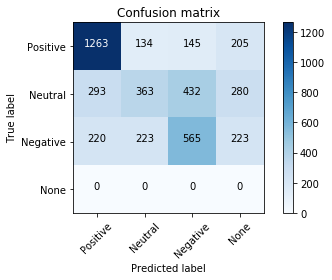

In [8]:
cm = confusion_matrix(y_true, y_pred_cnn)
plt.figure()
plot_confusion_matrix(cm, classes=classes)
plt.show()

Confusion matrix, without normalization
[[1053  584  110]
 [ 281  803  284]
 [ 187  282  762]]


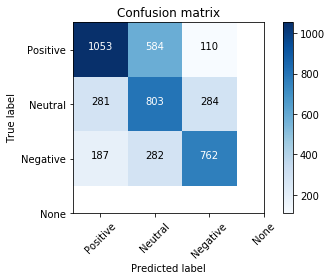

In [9]:
cm = confusion_matrix(y_true, y_pred_bayesian)
plt.figure()
plot_confusion_matrix(cm, classes=classes)
plt.show()

Confusion matrix, without normalization
[[1189  468   90]
 [ 311  787  270]
 [ 184  281  766]]


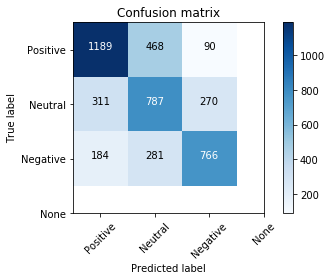

In [10]:
cm = confusion_matrix(y_true, y_pred_bayesian_cnn)
plt.figure()
plot_confusion_matrix(cm, classes=classes)
plt.show()

### CNN Accuracy

In [11]:
accuracy_score(y_true, y_pred_cnn)

0.5041417395306028

### Bayesian Network Accuracy

In [12]:
accuracy_score(y_true, y_pred_bayesian)

0.6023930050621261

### Bayesian + CNN Accuracy

In [13]:
accuracy_score(y_true, y_pred_bayesian_cnn)

0.630924988495168